In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
class_name = {
 0 : "Basketball Field",
 1 : "Building",
 2 : "Crosswalk",
 3 : "Football Field",
 4 : "Graveyard",
 5 : "Large Vehicule",
 6 : "Medium Vehicule",
 7 : "Playground",
 8 : "Roundabout",
 9 : "Ship",
 10 : "Small Vehicule",
 11 : "Swimming Pool",
 12 : "Tennis Court",
 13 : "Train"
}

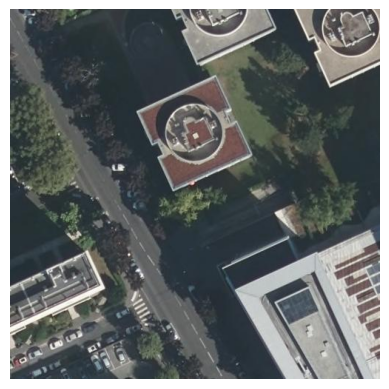

In [4]:
import cv2
image="75-2021-0640-6860-LA93-0M20-E080-386_jpeg_jpg.rf.d6c3eac9bec2d5740e44ac1257682f37"
path_training_img = "DataCadot/images/train/"
img = cv2.imread(path_training_img + image + ".jpg")

plt.figure()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [5]:
img.shape

(500, 500, 3)

In [6]:
path_training_label="DataCadot/labels/train/"
data = []
with open(path_training_label + image + ".txt", "r") as f:
    for ligne in f:
        valeurs = ligne.strip().split()
        data.append(valeurs)

print(data)

[['1', '0.510000', '0.336000', '0.332000', '0.312000'], ['10', '0.168000', '0.881000', '0.052000', '0.042000'], ['10', '0.215000', '0.858000', '0.046000', '0.032000'], ['10', '0.303000', '0.820000', '0.034000', '0.032000'], ['10', '0.064000', '0.925000', '0.044000', '0.038000'], ['10', '0.121000', '0.902000', '0.042000', '0.036000'], ['10', '0.224000', '0.911000', '0.044000', '0.038000'], ['10', '0.292000', '0.426000', '0.040000', '0.024000'], ['1', '0.794000', '0.804000', '0.412000', '0.392000'], ['10', '0.297000', '0.934000', '0.034000', '0.048000'], ['10', '0.272000', '0.888000', '0.052000', '0.036000'], ['10', '0.078000', '0.980000', '0.044000', '0.036000'], ['10', '0.334000', '0.866000', '0.044000', '0.032000'], ['10', '0.430000', '0.867000', '0.052000', '0.062000'], ['10', '0.347000', '0.714000', '0.026000', '0.032000'], ['10', '0.233000', '0.955000', '0.034000', '0.050000'], ['1', '0.130000', '0.795000', '0.260000', '0.286000'], ['10', '0.044000', '0.009000', '0.052000', '0.0180

In [7]:
len(data)

21

In [8]:
largeur_img = img.shape[1] # img.shape[0] =img.shape[1]
classid_list, xc_list, yc_list, w_list, h_list = [],[],[],[],[]
for i in range(len(data)):
    classid, xc, yc, w, h = map(float, data[i][0:5]) # xc,yc,w,h sont les coordonnées YOLO normalisées
    classid_list.append(classid), xc_list.append(xc*largeur_img), yc_list.append(yc*largeur_img), w_list.append(w*largeur_img), h_list.append(h*largeur_img)
    print(f"class id : {classid}, xc: {xc}, yc: {yc}, w: {w}, h: {h}")
    print(f"class id : {classid}, xc: {xc*largeur_img}, yc: {yc*largeur_img}, w: {w*largeur_img}, h: {h*largeur_img}") # coordonnées en pixels
    print("--------------------------------------------------------------")

class id : 1.0, xc: 0.51, yc: 0.336, w: 0.332, h: 0.312
class id : 1.0, xc: 255.0, yc: 168.0, w: 166.0, h: 156.0
--------------------------------------------------------------
class id : 10.0, xc: 0.168, yc: 0.881, w: 0.052, h: 0.042
class id : 10.0, xc: 84.0, yc: 440.5, w: 26.0, h: 21.0
--------------------------------------------------------------
class id : 10.0, xc: 0.215, yc: 0.858, w: 0.046, h: 0.032
class id : 10.0, xc: 107.5, yc: 429.0, w: 23.0, h: 16.0
--------------------------------------------------------------
class id : 10.0, xc: 0.303, yc: 0.82, w: 0.034, h: 0.032
class id : 10.0, xc: 151.5, yc: 410.0, w: 17.0, h: 16.0
--------------------------------------------------------------
class id : 10.0, xc: 0.064, yc: 0.925, w: 0.044, h: 0.038
class id : 10.0, xc: 32.0, yc: 462.5, w: 22.0, h: 19.0
--------------------------------------------------------------
class id : 10.0, xc: 0.121, yc: 0.902, w: 0.042, h: 0.036
class id : 10.0, xc: 60.5, yc: 451.0, w: 21.0, h: 18.0
------

In [9]:
#x1,x2,y1,y2 = [],[],[],[]
for i in range(len(data)):
    x1,x2,y1,y2 = int(xc_list[i] -w_list[i]/2), int(xc_list[i] + h_list[i]/2), int(yc_list[i] - w_list[i]/2), int(yc_list[i] + h_list[i]/2)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 1)
    label = class_name[int(classid_list[i])]
    cv2.putText(img, label, (x1, y1-5),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1)

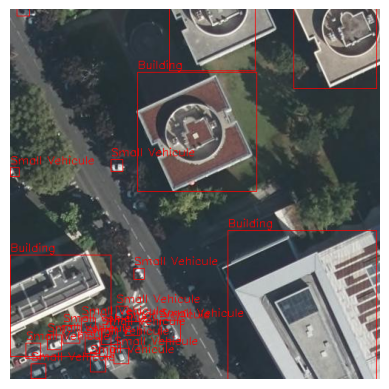

In [10]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis("off")
plt.show()